<a href="https://colab.research.google.com/github/jhlee508/sparta-pytorch/blob/master/week1_sparta_pytorch_1_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 선형 회귀 구현하기

In [1]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
# 현재 실습하고 있는 파이썬 코드를 재실행해도 다음에도 같은 결과가 나오도록
# 랜덤 시드(random seed)를 줍니다.
torch.manual_seed(1)   

In [3]:
# 훈련 데이터 정의
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

In [4]:
print(x_train)
print(x_train.shape) # 3행 1열

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])


In [5]:
print(y_train)
print(y_train.shape)

tensor([[2.],
        [4.],
        [6.]])
torch.Size([3, 1])


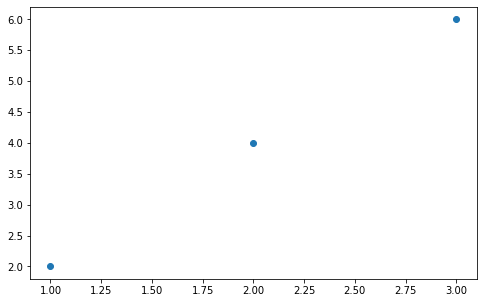

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(x_train, y_train)
plt.show()

# 2. 가중치와 편향의 초기화

- requires_grad = True: 학습을 통해 계속 값이 변경되는 변수
- Weight와 Bias 생성

In [27]:
# 가중치 W를 0으로 초기화하고 학습을 통해 값이 변경되는 변수임을 명시함.
W = torch.zeros(1, requires_grad=True)
print(W) # 가중치 W를 출력

tensor([0.], requires_grad=True)


In [28]:
b = torch.zeros(1, requires_grad=True)
print(b)

tensor([0.], requires_grad=True)


# 3. 가설 세우기

In [29]:
# H(x) = W*x + b
hypothesis = x_train * W + b

# 4. 비용 함수 선언하기

In [30]:
# 앞서 배운 torch.mean으로 평균을 구한다.
cost = torch.mean((hypothesis - y_train) ** 2) # MSE Loss ((예측값 - 실제값)^2의 평균)
print(cost)

tensor(18.6667, grad_fn=<MeanBackward0>)


# 5. 경사 하강법 구현하기

In [31]:
optimizer = optim.SGD([W, b], lr=0.01) # Stochastic Gradient Descent

In [32]:
# 옵티마이저의 gradient를 0으로 초기화
optimizer.zero_grad()
print(W, b)

tensor([0.], requires_grad=True) tensor([0.], requires_grad=True)


In [33]:
# 비용 함수를 미분하여 gradient 계산
cost.backward() 
# W와 b를 업데이트
optimizer.step()

In [34]:
print(W, b) # 한 번 학습 이후 W와 b 출력

tensor([0.1867], requires_grad=True) tensor([0.0800], requires_grad=True)


# 전체 코드

In [35]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# 현재 실습하고 있는 파이썬 코드를 재실행해도 다음에도 같은 결과가
# 나오도록 랜덤 시드(random seed)를 줍니다.
torch.manual_seed(1)

# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

# 모델 초기화 (W, b)
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정 (SGD)
optimizer = optim.SGD([W, b], lr=0.01)

nb_epochs = 2000 # 원하는만큼 경사 하강법을 반복

for epoch in range(nb_epochs + 1): # (nb_epochs + 1)번 반복

    # H(x) 계산 (예측값 생성)
    hypothesis = x_train * W + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad() 
    cost.backward() # Gradient 계산
    optimizer.step() # 한 번 W, b를 업데이트

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))

Epoch    0/2000 W: 0.187, b: 0.080 Cost: 18.666666
Epoch  100/2000 W: 1.746, b: 0.578 Cost: 0.048171
Epoch  200/2000 W: 1.800, b: 0.454 Cost: 0.029767
Epoch  300/2000 W: 1.843, b: 0.357 Cost: 0.018394
Epoch  400/2000 W: 1.876, b: 0.281 Cost: 0.011366
Epoch  500/2000 W: 1.903, b: 0.221 Cost: 0.007024
Epoch  600/2000 W: 1.924, b: 0.174 Cost: 0.004340
Epoch  700/2000 W: 1.940, b: 0.136 Cost: 0.002682
Epoch  800/2000 W: 1.953, b: 0.107 Cost: 0.001657
Epoch  900/2000 W: 1.963, b: 0.084 Cost: 0.001024
Epoch 1000/2000 W: 1.971, b: 0.066 Cost: 0.000633
Epoch 1100/2000 W: 1.977, b: 0.052 Cost: 0.000391
Epoch 1200/2000 W: 1.982, b: 0.041 Cost: 0.000242
Epoch 1300/2000 W: 1.986, b: 0.032 Cost: 0.000149
Epoch 1400/2000 W: 1.989, b: 0.025 Cost: 0.000092
Epoch 1500/2000 W: 1.991, b: 0.020 Cost: 0.000057
Epoch 1600/2000 W: 1.993, b: 0.016 Cost: 0.000035
Epoch 1700/2000 W: 1.995, b: 0.012 Cost: 0.000022
Epoch 1800/2000 W: 1.996, b: 0.010 Cost: 0.000013
Epoch 1900/2000 W: 1.997, b: 0.008 Cost: 0.000008

# 7. 결과 보기

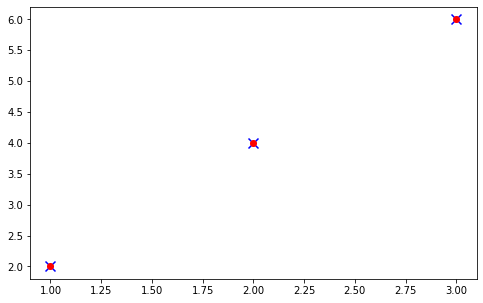

In [43]:
plt.figure(figsize=(8, 5))
plt.scatter(x_train, y_train, s=100, c='b', marker='x')
plt.scatter(x_train, hypothesis.detach().numpy(), c='r') # pytorch tensor를 Numpy array로 변형
plt.show()

# 8. torch.manual_seed()를 하는 이유


In [44]:
import torch

In [48]:
torch.manual_seed(3)
print('랜덤 시드가 3일 때')
for i in range(1, 3):
    print(torch.rand(1))

랜덤 시드가 3일 때
tensor([0.0043])
tensor([0.1056])


In [50]:
torch.manual_seed(5)
print('랜덤 시드가 5일 때')
for i in range(1, 3):
    print(torch.rand(1))

랜덤 시드가 5일 때
tensor([0.8303])
tensor([0.1261])


In [52]:
torch.manual_seed(3)
print('랜덤 시드가 다시 3일 때')
for i in range(1, 3):
  print(torch.rand(1))

랜덤 시드가 다시 3일 때
tensor([0.0043])
tensor([0.1056])


# 9. optimzer.zero_grad()가 필요한 이유

In [57]:
import torch

w = torch.tensor(2.0, requires_grad=True)

nb_epochs = 20
for epoch in range(nb_epochs + 1):

    z = 2*w
    # optimzer.zero_grad()가 없는 경우
    z.backward()
    print('수식을 w로 미분한 값 : {}'.format(w.grad)) # w 값이 누적되게 됨

수식을 w로 미분한 값 : 2.0
수식을 w로 미분한 값 : 4.0
수식을 w로 미분한 값 : 6.0
수식을 w로 미분한 값 : 8.0
수식을 w로 미분한 값 : 10.0
수식을 w로 미분한 값 : 12.0
수식을 w로 미분한 값 : 14.0
수식을 w로 미분한 값 : 16.0
수식을 w로 미분한 값 : 18.0
수식을 w로 미분한 값 : 20.0
수식을 w로 미분한 값 : 22.0
수식을 w로 미분한 값 : 24.0
수식을 w로 미분한 값 : 26.0
수식을 w로 미분한 값 : 28.0
수식을 w로 미분한 값 : 30.0
수식을 w로 미분한 값 : 32.0
수식을 w로 미분한 값 : 34.0
수식을 w로 미분한 값 : 36.0
수식을 w로 미분한 값 : 38.0
수식을 w로 미분한 값 : 40.0
수식을 w로 미분한 값 : 42.0
